In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import pickle



In [3]:
%matplotlib inline

In [4]:
import os
import pandas as pd

from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from yellowbrick.classifier import ClassificationReport
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from yellowbrick.datasets import load_game
from yellowbrick.model_selection import LearningCurve
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

In [5]:
df1 = pd.read_csv('auto-mpg_data.csv')
type(df1)

pandas.core.frame.DataFrame

In [6]:
len(df1)

398

In [7]:
pd.set_option('display.max_columns',30)
df1.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg
0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165,3693,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150,3436,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150,3433,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140,3449,10.5,70,1,ford torino,17.0


In [8]:
df1.describe()

,cylinders,displacement,weight,acceleration,model year,origin,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864,23.514573
std,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055,7.815984
min,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000,17.500000
50%,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,23.000000
75%,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000,29.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


In [9]:
pd.options.display.float_format = '{:.2f}'.format
df1.describe()

,cylinders,displacement,weight,acceleration,model year,origin,mpg
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,5.45,193.43,2970.42,15.57,76.01,1.57,23.51
std,1.70,104.27,846.84,2.76,3.70,0.80,7.82
min,3.00,68.00,1613.00,8.00,70.00,1.00,9.00
25%,4.00,104.25,2223.75,13.83,73.00,1.00,17.50
50%,4.00,148.50,2803.50,15.50,76.00,1.00,23.00
75%,8.00,262.00,3608.00,17.17,79.00,2.00,29.00
max,8.00,455.00,5140.00,24.80,82.00,3.00,46.60


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


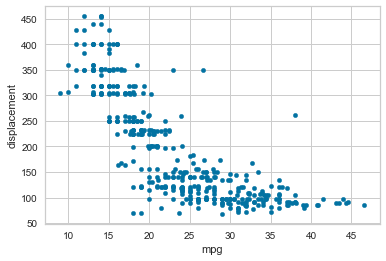

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
df1.plot("mpg", "displacement", kind= "scatter")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D3AE163208>,
      dtype=object)

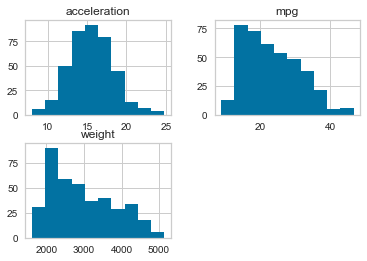

In [11]:
df1.hist(column = ["mpg","acceleration","weight","horsepower"])

In [12]:

dataset=df1
features = ['cylinders','displacement','weight','acceleration','model year','origin','model year','car name']
target   = ['mpg']

X = dataset[features]
y = dataset[target]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=12.
  % (min_groups, self.n_splits)), Warning)


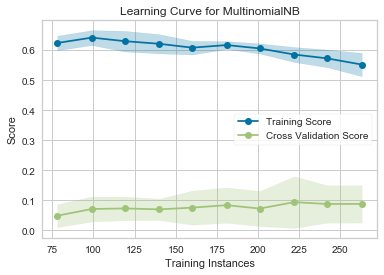

In [13]:
# Encode the categorical data
X = OneHotEncoder().fit_transform(X)
y = LabelEncoder().fit_transform(y)

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer
model = MultinomialNB()
visualizer = LearningCurve(
    model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=6
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [14]:
df1.columns = ['cylinders','displacement','weight','acceleration','model year','mpg','origin','model year','car name']

In [15]:
df1.head()

,cylinders,displacement,weight,acceleration,model year,mpg,origin,model year,car name
0,8,307.00,130,3504,12.00,70,1,chevrolet chevelle malibu,18.00
1,8,350.00,165,3693,11.50,70,1,buick skylark 320,15.00
2,8,318.00,150,3436,11.00,70,1,plymouth satellite,18.00
3,8,304.00,150,3433,12.00,70,1,amc rebel sst,16.00
4,8,302.00,140,3449,10.50,70,1,ford torino,17.00


In [16]:
df1.describe()

,cylinders,displacement,acceleration,model year,mpg,origin,car name
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,5.45,193.43,2970.42,15.57,76.01,1.57,23.51
std,1.70,104.27,846.84,2.76,3.70,0.80,7.82
min,3.00,68.00,1613.00,8.00,70.00,1.00,9.00
25%,4.00,104.25,2223.75,13.83,73.00,1.00,17.50
50%,4.00,148.50,2803.50,15.50,76.00,1.00,23.00
75%,8.00,262.00,3608.00,17.17,79.00,2.00,29.00
max,8.00,455.00,5140.00,24.80,82.00,3.00,46.60


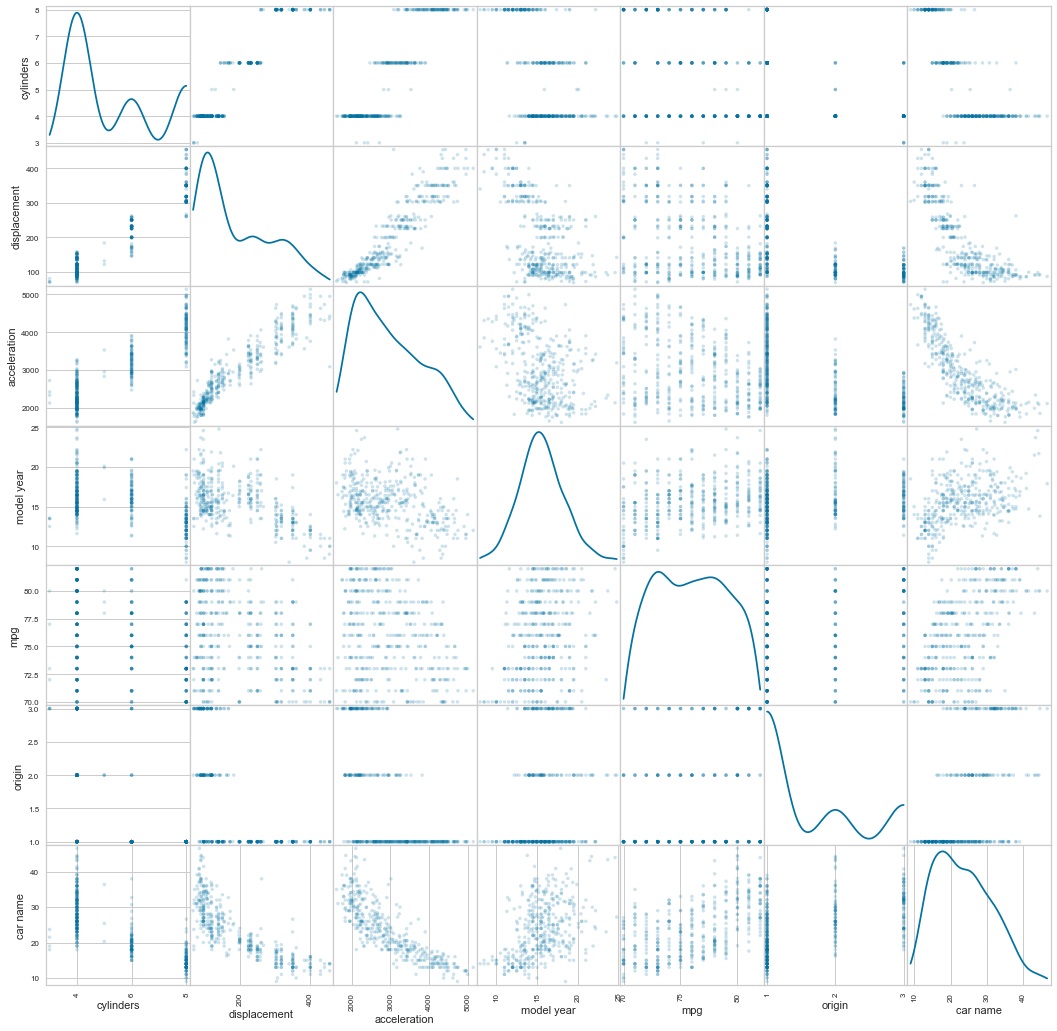

In [17]:
scatter_matrix(df1, alpha=0.2, figsize=(18,18), diagonal='kde')
plt.show()

def score_model(X, y, estimator,**kwargs):
    """
    Test various estimators.
    """ 
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
         ('one_hot_encoder', OneHotEncoder()), 
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y,**kwargs)  
    
    expected  = y
    predicted = model.predict(X)
    
    # Compute and return F1 (harmonic mean of precision and recall)
    print("{}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))# Try them all!

models = [
    SVC(gamma='auto'), NuSVC(gamma='auto') 
]

for model in models:
    score_model(X, y, model)


In [ ]:
auto_features = df1.iloc[:,0:8]
auto_labels = df1.iloc[:,8]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(auto_features, auto_labels, test_size=8)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print('Linear Regression model')
print('Mean Squared Error: '  mse(expected, predicted))
print('Coefficient of Determination: '  r2_score(expected, predicted))

In [ ]:
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print('Ridge model')
print('Mean Squared Error: %0.3f' % mse(expected, predicted))
print('Coefficient of Determination: %0.3f' % r2_score(expected, predicted))

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print('Random Forest model')
print('Mean squared error = %0.3f' % mse(expected, predicted))
print('R2 score = %0.3f' % r2_score(expected, predicted))